In [1]:
import pandas as pd
import sklearn as testkit_training
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.discrete.discrete_model as sm

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Load Data**

In [2]:
train = pd.read_csv('/content/train.csv')
train.head(5)
del train['Ticket']

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


**Step I: Exploratory Data Analysis**

In [4]:
train.dtypes, train.shape, train.describe()

(PassengerId      int64
 Survived         int64
 Pclass           int64
 Name            object
 Sex             object
 Age            float64
 SibSp            int64
 Parch            int64
 Fare           float64
 Cabin           object
 Embarked        object
 dtype: object,
 (891, 11),
        PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
 count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
 mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
 std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
 min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
 25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
 50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
 75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
 max     891.000000    1.000

In [5]:
pd.DataFrame({'Survivers': [True]}).bool()

True

In [6]:
survivers = train.loc[(train['Survived']==True)]

In [8]:
print('Number of Survivers in the train-data-set:', survivers['Survived'].size)

Number of Survivers in the train-data-set: 342


In [9]:
no_of_survivers = survivers['Survived'].size

In [10]:
dead = train.loc[(train['Survived']==False)]
dead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  549 non-null    int64  
 1   Survived     549 non-null    int64  
 2   Pclass       549 non-null    int64  
 3   Name         549 non-null    object 
 4   Sex          549 non-null    object 
 5   Age          424 non-null    float64
 6   SibSp        549 non-null    int64  
 7   Parch        549 non-null    int64  
 8   Fare         549 non-null    float64
 9   Cabin        68 non-null     object 
 10  Embarked     549 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 51.5+ KB


In [11]:
no_of_dead = dead['Survived'].size
print('Numer of drowned Passengers in the train-data-set:' ,no_of_dead)

Numer of drowned Passengers in the train-data-set: 549


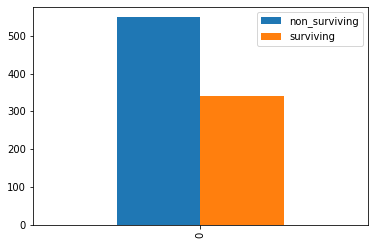

In [12]:
train_plot = ({'non_surviving':[no_of_dead], 'surviving':[no_of_survivers]})
train_plot_2 = pd.DataFrame(data=train_plot)
df = train_plot_2.plot.bar()

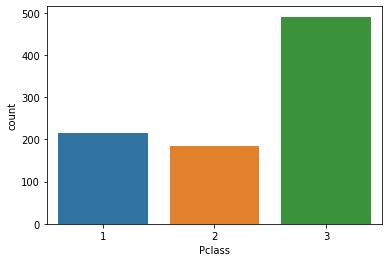

In [13]:
sns.countplot(x='Pclass', data=train) #number of passengers in each class

**Imputation of missing data**

In [ ]:
imputer = SimpleImputer(strategy='most_frequent') # for the Column embarked the heatmap showed a missing value, 
#hence the missing value is added on the case of the most frequent value
imputer.fit(train[['Embarked']])        # learn the most frequent value
imputer.transform(train[['Embarked']])  # transform the column

In [15]:
train_age = train.fillna(train.mean()) #Moreover the exploration phase showed, that in the age columen different values are missing
#in order to not alter the data to much, the mean age is calculated and attributed to the missing values
train_age.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,30.0708,NaN,C


**More EDA**

Which passenger class embarked from which port mostly. Is it possible to draw any conclusion out of the embarkment column.

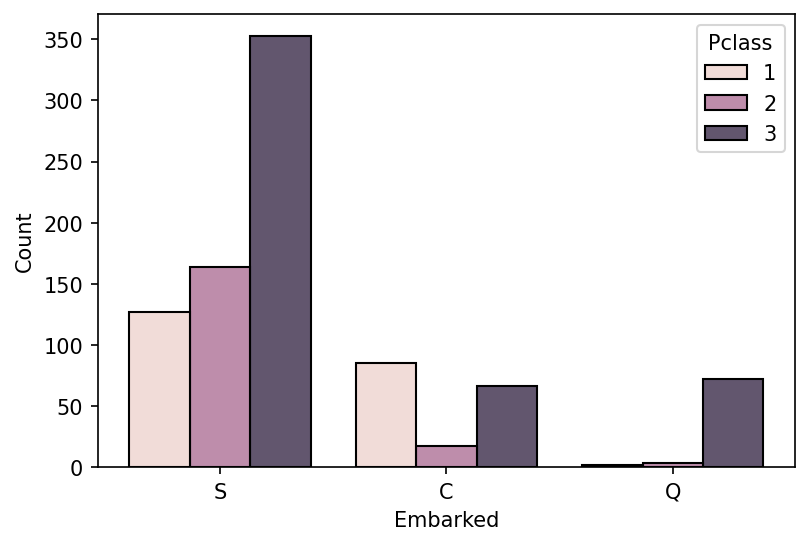

In [29]:
plt.figure(dpi=150)
sns.histplot(data=train_age, x='Embarked', hue='Pclass', multiple="dodge", shrink=.8)

**City of Southhampton:** 
Port of Southhampton was for the Passengers coming from London the closest Port to reach.
Allthoug the first embarkment of the HMS Titanic on their first leg to New York took place at Southhampton 

**Cherbourg (France):** Since the harbour was at that time to small for the big ship, the titanic anchored in front of the harbour and couple of passengers (15 1st class and seven 2nd class) left the titanic and were transfered by little boats to the mainland. 

**Queenstown (Ireland):** Again the Titanic could not enter the harbour and had to anchor in front of it. Again seven 1st class passengers, which had embarked the titanic in France left the ship and in return 113 3rd class and seven 2nd class passengers embarked in Ireland. 

*Now it's time to apply the imputed data on the data set*


In [26]:
train_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C148,C


**Fetch the data from the DataFrame**

In [ ]:
X_train = train[['Pclass',]] #fetch the numeric data from the df and create a new df as X
y_train = train['Survived']

**Split the Dataset**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size= 0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 3), (223, 3), (668,), (223,))

**One-Hot-Encoding**

In [ ]:
one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [ ]:
cols = X_train[['Pclass']]

In [ ]:
ohc.fit(cols)

In [ ]:

#one_hot.fit(X_train[['Pclass','Sex']])           # learn the categories
#one_hot.transform(X_train[['Pclass','Sex']])     # apply the transformation

In [ ]:
m = LogisticRegression(class_weight='balanced')
m.fit(X_train,y_train)

ValueError: ignored